In [1]:
from datetime import datetime
import datetime as dt
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import pandas as pd
import pytz
import numpy as np
from plotly import graph_objects as go
import os
# Display MetaTrader5 package information

print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for i in lst_:
    # Initialize connection to the MetaTrader 5 terminal
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        quit()

    

 # Get historical price data for USD/JPY on a 30-minute timeframe
    symbol = i# Set the time zone to UTC
    timezone = pytz.timezone("Etc/UTC")

    # Define the date and time range for historical data
    hours_offset = dt.timedelta(hours=24*2)
    local_time = datetime.today()
    utc_from = local_time.astimezone(timezone)-hours_offset
    utc_to = local_time 
    timeframe = mt5.TIMEFRAME_M1
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)
     # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_30_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

    # Shut down the connection to the MetaTrader 5 terminal
    mt5.shutdown()


MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.


In [3]:
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')

In [4]:
df_close.columns = [i for i in lst_ if 'JPY' not in i]

In [5]:
corr_close = df_close.corr()
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_Daily.xlsx')

In [6]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_Dailycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

In [7]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_Dailycorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

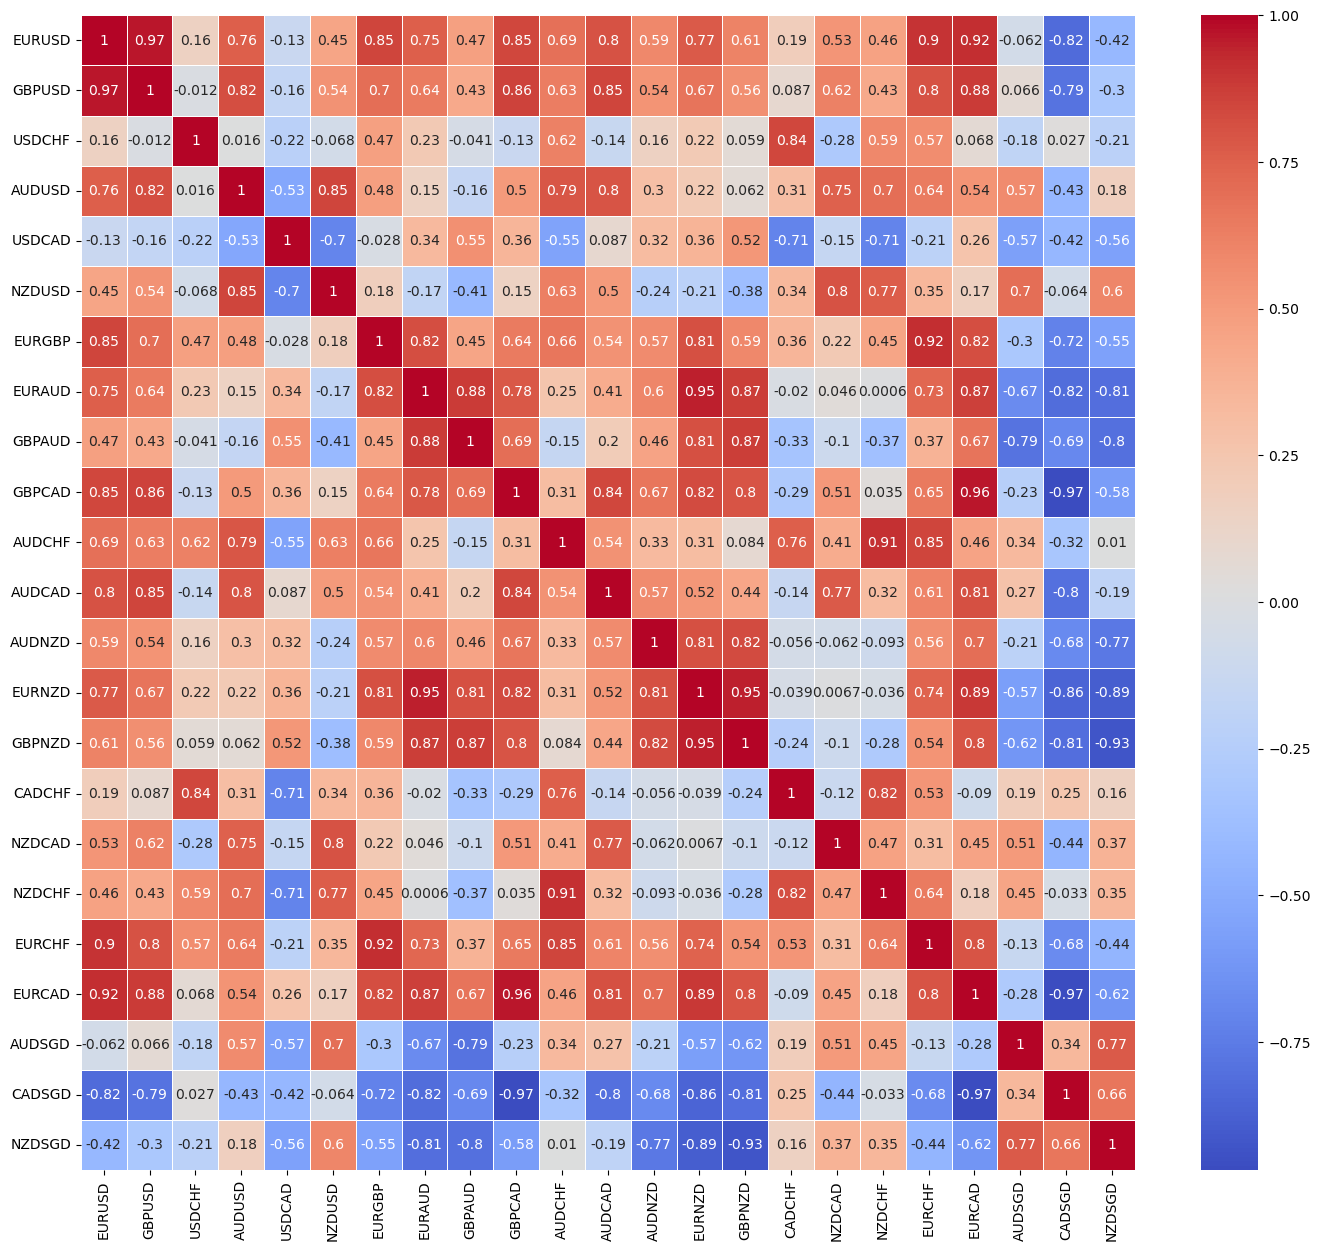

In [8]:
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-Daily.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();